In [1]:
## loading in all of the important libraries
import os
import pandas as pd
import numpy as np
import torch as pt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [50]:
# loading in the dataset and getting some metrics out of it
df = pd.read_csv('FairFace/fairface_label_train.csv')  

# Encode categorical labels
age_bins = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', 'more than 70']
df = df[df['age'].isin(age_bins)]  # ensure only those bins are used
age_encoder = LabelEncoder()
df['age_label'] = age_encoder.fit_transform(df['age'])

race_encoder = LabelEncoder()
df['race_label'] = race_encoder.fit_transform(df['race'])

# remove service_test column
df = df.drop(columns=['service_test'])

def balance_by_multiple_attributes(df, attr_cols, n_per_group):
    """
    Balances the dataframe by sampling n_per_group from each combination of values in attr_cols.
    
    Args:
        df (DataFrame): Your original dataframe
        attr_cols (list): List of columns to group by (e.g., ['age_label', 'gender'])
        n_per_group (int): Number of samples per group
        
    Returns:
        Balanced DataFrame
    """
    grouped = df.groupby(attr_cols)
    balanced_df = grouped.apply(lambda x: x.sample(n=min(len(x), n_per_group), random_state=42))
    balanced_df = balanced_df.reset_index(drop=True)
    return balanced_df

newSet = balance_by_multiple_attributes(df, ['age_label', 'gender', 'race_label'], 250)
print(newSet)


                  file           age  gender   race  age_label  race_label
0      train/42288.jpg           0-2  Female  Black          0           0
1      train/21191.jpg           0-2  Female  Black          0           0
2      train/56271.jpg           0-2  Female  Black          0           0
3      train/84449.jpg           0-2  Female  Black          0           0
4         train/19.jpg           0-2  Female  Black          0           0
...                ...           ...     ...    ...        ...         ...
25884  train/26039.jpg  more than 70    Male  White          8           6
25885  train/69542.jpg  more than 70    Male  White          8           6
25886  train/85279.jpg  more than 70    Male  White          8           6
25887  train/22469.jpg  more than 70    Male  White          8           6
25888  train/61193.jpg  more than 70    Male  White          8           6

[25889 rows x 6 columns]


C:\Users\sharm\AppData\Local\Temp\ipykernel_26248\229225782.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = grouped.apply(lambda x: x.sample(n=min(len(x), n_per_group), random_state=42))


In [ ]:
# print(df['age'].unique())
# print(df['age_label'].unique())

age_labels_dict = {}
race_labels_dict = {}
for i in range(len(age_bins)):
    age_labels_dict.update({age_bins[i]: i})
    
for i in range(len(df['race_label'].unique())):
    race_labels_dict.update({df['race'].unique()[i]: i})
    

print(age_labels_dict)
print(race_labels_dict)
# Black: 0, East Asian: 1, Indian: 2, Latino Hispanic: 3, Middle Eastern: 4, Southeast Asian: 5, White: 6\

# print(df.head())

In [35]:
# normalize the dataset
# For gender: 10k Male + 10k Female for training
train_set_df = pd.concat([
    df[df['gender'] == 'Male'].sample(n=10000, random_state=42),
    df[df['gender'] == 'Female'].sample(n=10000, random_state=42)
])

## Output of Encoding for age and race
list(zip(age_encoder.classes_, range(len(age_encoder.classes_))))
list(zip(race_encoder.classes_, range(len(race_encoder.classes_))))

20-29


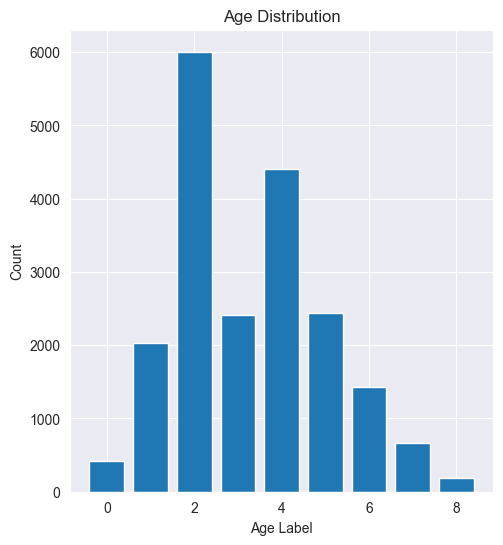

In [37]:
# turn into histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(age_label_value.index, age_label_value.values)
plt.title('Age Distribution')
plt.xlabel('Age Label')
plt.ylabel('Count')

# print((train_set_df['age_label']==2).sum())
print(age_encoder.inverse_transform([0])[0])

Text(0, 0.5, 'Count')

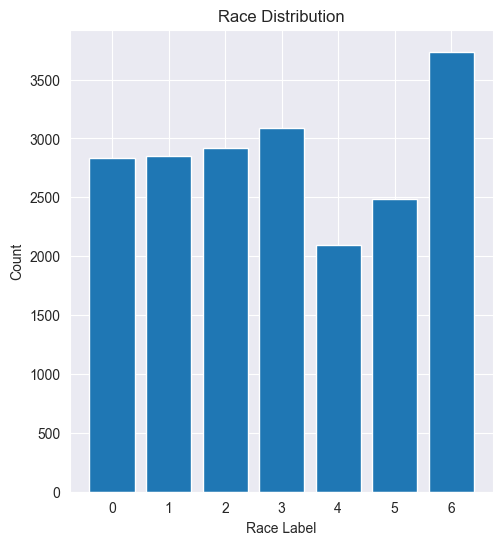

In [30]:
# turn into histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(race_label_value.index, race_label_value.values)
plt.title('Race Distribution')
plt.xlabel('Race Label')
plt.ylabel('Count')

                  file           age  gender   race  age_label  race_label
0      train/42288.jpg           0-2  Female  Black          0           0
1      train/21191.jpg           0-2  Female  Black          0           0
2      train/56271.jpg           0-2  Female  Black          0           0
3      train/84449.jpg           0-2  Female  Black          0           0
4         train/19.jpg           0-2  Female  Black          0           0
...                ...           ...     ...    ...        ...         ...
25884  train/26039.jpg  more than 70    Male  White          8           6
25885  train/69542.jpg  more than 70    Male  White          8           6
25886  train/85279.jpg  more than 70    Male  White          8           6
25887  train/22469.jpg  more than 70    Male  White          8           6
25888  train/61193.jpg  more than 70    Male  White          8           6

[25889 rows x 6 columns]


C:\Users\sharm\AppData\Local\Temp\ipykernel_26248\323961701.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = grouped.apply(lambda x: x.sample(n=min(len(x), n_per_group), random_state=42))
